# Functions

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import ndimage
from sklearn.decomposition import PCA

import os
%matplotlib inline

In [13]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('Modules')
from time_shifted_PID import MIfunc
from time_shifted_PID import EqualState
from Spike_Generation import SG
from Spike_Generation import NL

In [14]:
exp_folder = 'D:\\GoogleDrive\\retina\\Troy\'s data\\20210910\\SplitData\\'
Mean = 10
amp_list = [0.5,1,1.5,2,3]
WNSTA_list = []
ExpSTA_list = []
for amp in amp_list:
    filename = 'diode_WhiteNoise_mean='+str(Mean)+'_amp='+str(amp)+'_11-Aug-2021_0'
    loadfiles = np.load(exp_folder+'STA\\STA_'+filename+'.npz', allow_pickle=True)
    for k in loadfiles.files:
        vars()[k] = loadfiles[k][()]
    WNSTA_list.append(STA_cell.copy())

In [21]:
cn = 24

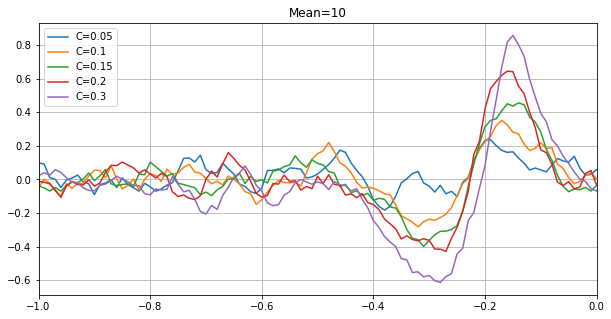

In [22]:
for i in range(len(amp_list)):
    plt.plot(timeshift, WNSTA_list[i][cn-1], label = 'C='+str(round(amp_list[i]/Mean,3)))

plt.legend()
plt.grid('on')
plt.xlim(-1,0)
plt.title('Mean='+str(Mean))
plt.gcf().set_size_inches(10,5)

In [23]:
X = X = np.zeros((101,5))
for i in range(len(amp_list)):
    X[:,i] = WNSTA_list[i][cn-1][:101]



In [24]:
pca=PCA(n_components=2)
PC = pca.fit(X).transform(X)

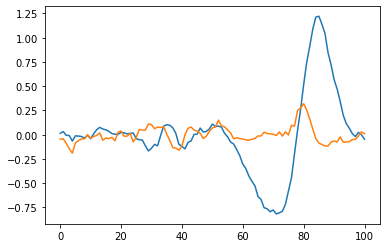

In [25]:
plt.plot(PC[:,0])
plt.plot(PC[:,1])

In [26]:
pca_corr = np.zeros((2,5))
for i in range(len(amp_list)):
    pca_corr[0,i] = np.sum(PC[:,0]*WNSTA_list[i][cn-1][:101])
    pca_corr[1,i] = np.sum(PC[:,1]*WNSTA_list[i][cn-1][:101])

Text(0, 0.5, 'PC2')

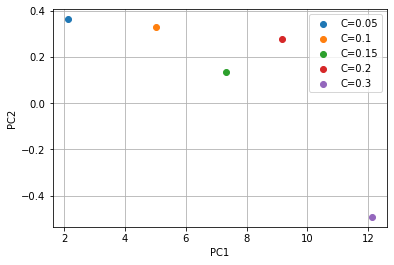

In [27]:
for i in range(len(amp_list)):
    plt.scatter(pca_corr[0,i], pca_corr[1,i], label = 'C='+str(round(amp_list[i]/Mean,3)))

plt.legend(loc='best')
plt.grid('on')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.xlim(-1,0)
# plt.title('Mean='+str(Mean))
# plt.gcf().set_size_inches(10,5)